# Read Demo
- import function from demo_utils.py

In [1]:
import demo_utils
print(dir(demo_utils))

['Enum', 'TRAJECTORY_INDEX', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'deque', 'extract_experiences_from_indexed_trajs', 'extract_transitions_from_indexed_trajs', 'get_flatten_indexed_trajs', 'get_flatten_indexed_utility_info', 'get_flatten_trajectories', 'get_flatten_utility_info', 'get_indexed_trajs', 'get_indexed_utility_info', 'get_n_step_info', 'get_n_step_info_from_demo', 'np', 'pickle', 'read_expert_demo', 'read_expert_demo_utility_info', 'split_fixed_length_indexed_traj', 'split_fixed_length_traj']


## Get all States

In [9]:
def get_all_states():
    fname_demo = 'pacman_random_0/traj_pacman_random_0.pickle'
    demo_list = demo_utils.read_expert_demo(fname_demo)
    # print('number of trajectories: ', len(demo_list))
    # get flatten trajectories
    flat_demo_list = demo_utils.get_flatten_trajectories(demo_list)
    
    n_states = len(flat_demo_list)
    states_list = [None for _ in range(n_states)]
    for i in range(n_states):
        states_list[i] = flat_demo_list[i][0]
    return states_list

states = get_all_states()
print('shape: ', states[9].shape)
print('n states: ', len(states))

shape:  (48, 126, 3)
n states:  35209


## Function You Need
- read_expert_demo: return trajectories (trajectories are stored in separated list)
- get_flatten_demos: return all transitions tuple(state, action, reward, next_state, is_done) in a single list

In [ ]:
fname_demo = 'pacman_random_0/traj_pacman_random_0.pickle'
demo_list = demo_utils.read_expert_demo(fname_demo)
# print('number of trajectories: ', len(demo_list))
# get flatten trajectories
flat_demo_list = demo_utils.get_flatten_trajectories(demo_list)
print('number of transitions: ', len(flat_demo_list))

## Get the States
- each state is a numpy array
- shape: (3, 84, 189) (can be used in pytorch directly)
- to get each state, you only need to interate through flat_demo_list\[i\]\[0\] (the first element with index 0 in each transition tuple is the state you need)

In [ ]:
# take the first state as example
print(flat_demo_list[0][0].shape)

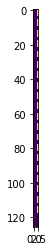

In [6]:
from torchvision.transforms import ToPILImage
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(states[9][0])

## To Grayscale
- If do grayscale, you might need this function

In [ ]:
def to_grayscale(state):
    return np.dot(state[..., :3], [0.299, 0.587, 0.114])

state = flat_demo_list[9][0]
gray_state = to_grayscale(state)
print('grayscale state shape: ', gray_state.shape)

plt.imshow(gray_state, cmap='gray', vmin=0, vmax=255)

original shape:  (48, 126, 3)
after obs shape:  (48, 126, 1)


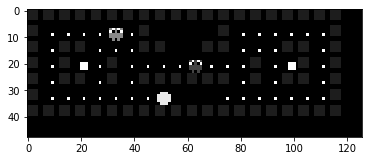

In [24]:
def to_grayscale(rgb):
    """ the rgb should in the format of (height, width, 3) """
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

def observation(observation):
    # and finally we change order of dimensions for every single observation
    # here transpose method could be also used
    obs = observation.astype(float)
    if True:
        obs = np.expand_dims(to_grayscale(obs), axis=2)
    if True:
        for i_channel in range(obs.shape[2]):
            channel_min = np.min(obs[:, :, i_channel])
            channel_max = np.max(obs[:, :, i_channel])
            delta = channel_max - channel_min
            if delta == 0:
                obs[:, :, i_channel] = np.zeros_like(obs[:, :, i_channel], dtype=np.float)
            else:
                obs[:, :, i_channel] = (obs[:, :, i_channel] - channel_min) / (channel_max - channel_min)
    return obs

state = states[9]
print('original shape: ', state.shape)
print('after obs shape: ', observation(state).shape)
plt.imshow(observation(state)[:, :, 0], cmap='gray', vmin=0, vmax=1.0)